## Transformation of Non-Linear Datasets for Linear Regression

This project explores the potential of using different features to solve a classification problem. 

1. Begin by importing the *two moons* dataset from ``sklearn``. Draw from this 500 samples, with a noise of 0.2. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
data, y = datasets.make_moons(n_samples = 500, noise=.2)
X = data

2. Fit a logistic regression model to a subset (training set) of the data, and evaluate the accuracy on the test set. 


**a. Risk of this model?**

The risk of this model is that it assumes the given data could be divided/classified linearly. The problem is that 
in the real-world, many problems cannot be seperated linearly. 

**b. Is this problem linearly seperable?**

As the plot shows, this dataset portrays a circle, which is non-linear. This problem cannot be linearly seperable,
as the behavior of the dataset is non-linear, and there is no clear boundary/direction in which a linear regression model could classify. 
Overall, the accuracy score looks good, but when I look at the confusion matrix, the numbers of false positive and false negative
are high. The values for sensitivity and specificity are not as high as expected. 
The plot shows that there are some 1s in the 0's area. 


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
model = LogisticRegression().fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

[0.22279625]
[[ 1.21030718 -3.909793  ]]


In [4]:
print('test_score:', model.score(X_test, y_test))
ypred = model.predict(X_test)

from sklearn import metrics
#print("accuracy score:", metrics.accuracy_score(y_test, ypred))
print("confusion matrix")
A=metrics.confusion_matrix(y_test,ypred)
print(A)
print("sensitivity = ", A[0,0]/(61+18))
print("specificity = ", 1-A[1,0]/(11+60))

test_score: 0.8733333333333333
confusion matrix
[[70  6]
 [13 61]]
sensitivity =  0.8860759493670886
specificity =  0.8169014084507042


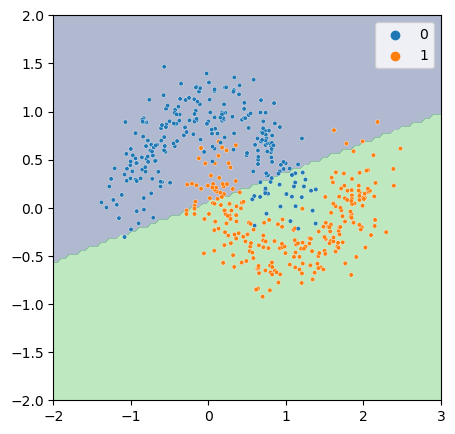

In [5]:
xp = np.linspace(-2,3,100)
yp = np.linspace(-2,2,100)
xx, yy = np.meshgrid(xp,yp)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.figure(figsize=(5,5))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4,levels=1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, s=10)
plt.show()

*Another way to plot the datasets*

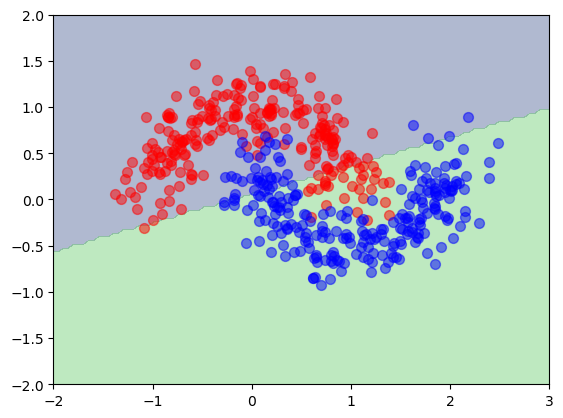

In [6]:
xp = np.linspace(-2,3,100)
yp = np.linspace(-2,2,100)
xx, yy = np.meshgrid(xp,yp)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

fig, axes = plt.subplots()
colours = ('red', 'blue')
Z = Z.reshape(xx.shape)
axes.contourf(xx, yy, Z, alpha=0.4,levels=1)
for i in range(2):
    axes.scatter(X[y == i][:,0],
              X[y==i][:, 1], 
               c=colours[i], 
               s=50, 
               label=str(i),alpha=0.5)


3. This project now attempts to make the problem more linearly separable by constructing suitable non-linear features from the given data. Note that each sample is a vector $x\in\mathbb R^2$, $x = [x_1,x_2]$. 
- Construct new features by computing polynomials of these two coordinates (e.g. $x_1^2, x_1^3, x_1x_2$, etc). 
- Explore a few options, and train the same model on these different choices of features. 
-Pick the best performing one.

In [7]:
score_all = []
score = []

Xtrain, Xtest, ytrain, ytest, = train_test_split(X, y, test_size = .3)
model1 = LogisticRegression().fit(Xtrain,ytrain)
ypred1 = model1.predict(Xtest)

print("<Information about default model")
print("intercpet:",model1.intercept_)
print("coef:", model1.coef_,"\n")
print('test_score:', model1.score(Xtest, ytest))
ypred1 = model1.predict(Xtest)

print("confusion matrix")
A=metrics.confusion_matrix(ytest,ypred)
print(A)
print("sensitivity = ", A[0,0]/(A[0,0]+A[0,1]))
print("specificity = ", 1-A[1,0]/(A[1,0]+A[1,1]))
    
for i in range(50):
    Xtrain, Xtest, ytrain, ytest, = train_test_split(X, y, test_size = .3)
    model1 = LogisticRegression().fit(Xtrain,ytrain)
    ypred1 = model1.predict(Xtest)
    score.append(model1.score(Xtest, ytest))
score_all.append(score)

<Information about default model
intercpet: [0.27683682]
coef: [[ 1.15482374 -3.96699704]] 

test_score: 0.86
confusion matrix
[[39 30]
 [44 37]]
sensitivity =  0.5652173913043478
specificity =  0.45679012345679015


In [8]:
X_2 = np.array([i**2 for i in X]).reshape(-1,2)
X_3 = np.array([i**3 for i in X]).reshape((-1,2))
X_4 = np.array([i**4 for i in X]).reshape((-1,2))
X1X2 = np.array([i*j for i,j in X]).reshape((-1,1))
X_2_X = np.array([i**2 + i for i in X]).reshape((-1,2))
X_2__x1x2 = np.c_[np.array([i**2 for i in X]).reshape((-1,2)), np.array([j*i for j,i in X])]
X_4_X_3_X_2_X = np.array([i**4 + i**3 + i**2 + i for i in X]).reshape((-1,2))
combined = [X_2, X_3, X_4, X1X2, X_2_X, X_2__x1x2, X_4_X_3_X_2_X]
name = ['x^2', 'x^3', 'x^4', 'X1X2', 'x^2+x', 'x1^2, x1x2, x2^2', 'X^4+X^3+X^2+X', 'default']

<Information about the model with x^2 feature>
intercpet: [0.35117759]
coef: [[ 0.59944304 -2.84846314]] 

test_score: 0.7
confusion matrix
[[46 31]
 [37 36]]
sensitivity =  0.5974025974025974
specificity =  0.4931506849315068


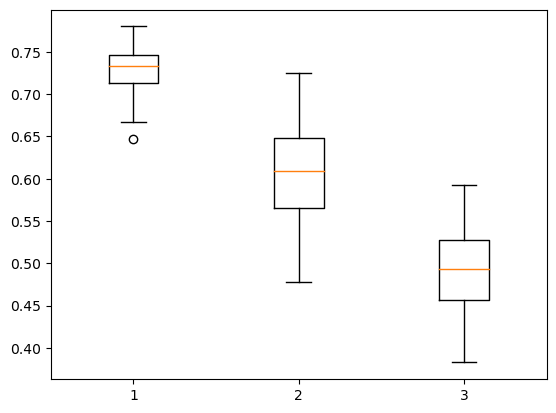

<Information about the model with x^3 feature>
intercpet: [-0.09854974]
coef: [[ 0.71395263 -4.41934799]] 

test_score: 0.82
confusion matrix
[[41 27]
 [42 40]]
sensitivity =  0.6029411764705882
specificity =  0.4878048780487805


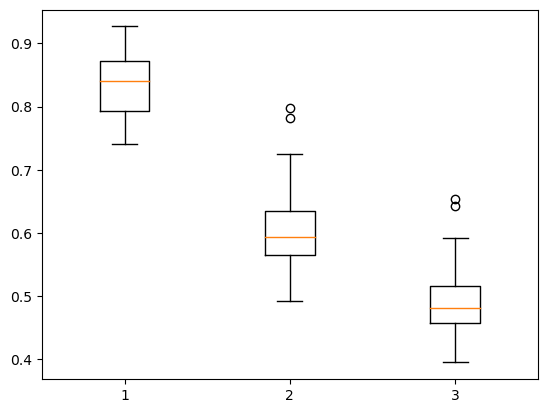

<Information about the model with x^4 feature>
intercpet: [-0.10204656]
coef: [[ 0.34185841 -2.63647945]] 

test_score: 0.68
confusion matrix
[[37 35]
 [46 32]]
sensitivity =  0.5138888888888888
specificity =  0.41025641025641024


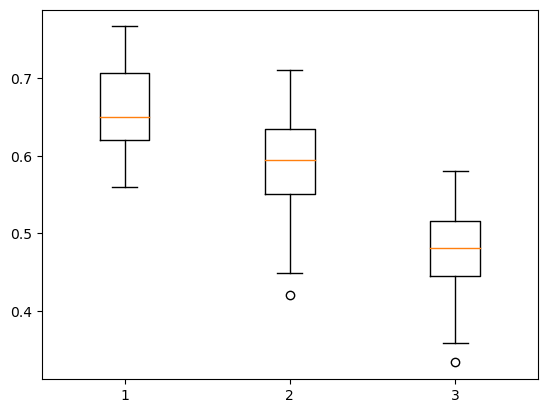

<Information about the model with X1X2 feature>
intercpet: [0.05531134]
coef: [[-0.55788571]] 

test_score: 0.5866666666666667
confusion matrix
[[47 35]
 [36 32]]
sensitivity =  0.573170731707317
specificity =  0.47058823529411764


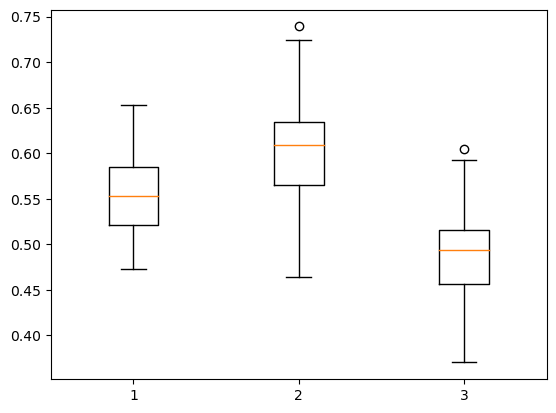

<Information about the model with x^2+x feature>
intercpet: [0.46625547]
coef: [[ 0.54376605 -3.02754647]] 

test_score: 0.8333333333333334
confusion matrix
[[37 39]
 [46 28]]
sensitivity =  0.4868421052631579
specificity =  0.3783783783783784


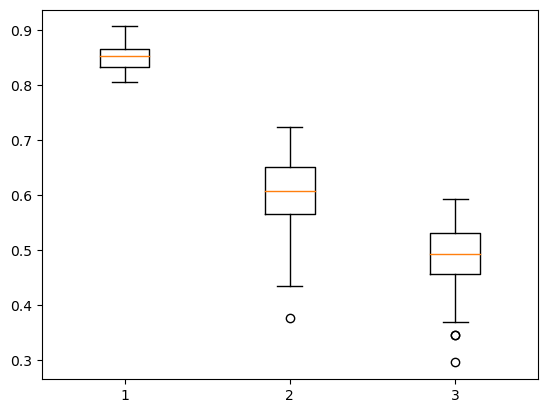

<Information about the model with x1^2, x1x2, x2^2 feature>
intercpet: [0.04223727]
coef: [[ 0.72017413 -2.72242727 -0.9999873 ]] 

test_score: 0.6866666666666666
confusion matrix
[[41 36]
 [42 31]]
sensitivity =  0.5324675324675324
specificity =  0.4246575342465754


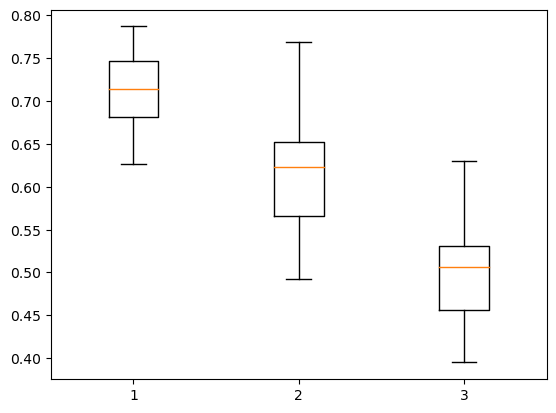

<Information about the model with X^4+X^3+X^2+X feature>
intercpet: [0.5749586]
coef: [[ 0.16170526 -2.10194005]] 

test_score: 0.8666666666666667
confusion matrix
[[38 30]
 [45 37]]
sensitivity =  0.5588235294117647
specificity =  0.4512195121951219


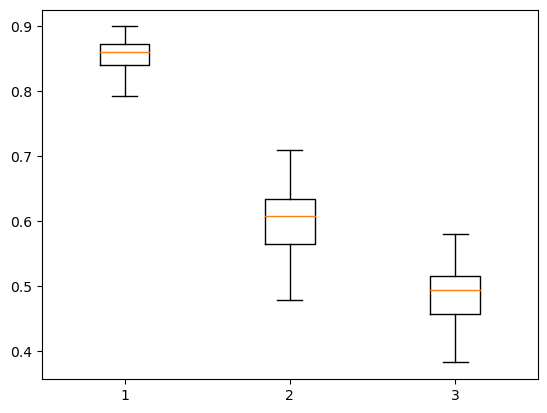

In [9]:
for i in range(len(combined)):
    score = []
    sensitivity = []
    specificity = []
    X1 = combined[i]
    Xtrain, Xtest, ytrain, ytest, = train_test_split(X1, y, test_size = .3)
    model1 = LogisticRegression().fit(Xtrain,ytrain)
    print("<Information about the model with", name[i], "feature>")
    print("intercpet:",model1.intercept_)
    print("coef:", model1.coef_,"\n")
    print('test_score:', model1.score(Xtest, ytest))
    ypred1 = model1.predict(Xtest)

    print("confusion matrix")
    A=metrics.confusion_matrix(ytest,ypred)
    print(A)
    print("sensitivity = ", A[0,0]/(A[0,0]+A[0,1]))
    print("specificity = ", 1-A[1,0]/(A[1,0]+A[1,1]))

    for i in range(50):
        Xtrain, Xtest, ytrain, ytest, = train_test_split(X1, y, test_size = .3)
        model1 = LogisticRegression().fit(Xtrain,ytrain)
        ypred1 = model1.predict(Xtest)

        A=metrics.confusion_matrix(ytest,ypred)
        score.append(model1.score(Xtest, ytest))
        sensitivity.append(A[0,0]/(39+30))
        specificity.append(1-A[1,0]/(34+47))
    score_all.append(score)
    plt.boxplot([score, sensitivity, specificity] )
    plt.show()

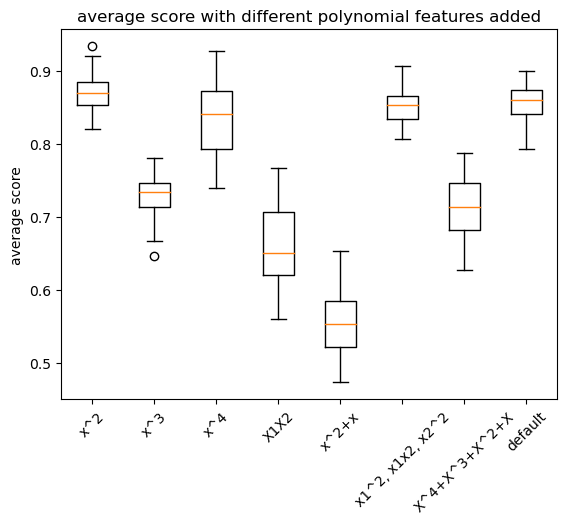

In [10]:
plt.boxplot(score_all)
plt.xticks([1,2,3,4,5,6,7,8], name)
plt.ylabel("average score")
plt.title("average score with different polynomial features added")
plt.xticks(rotation=45)
plt.show()

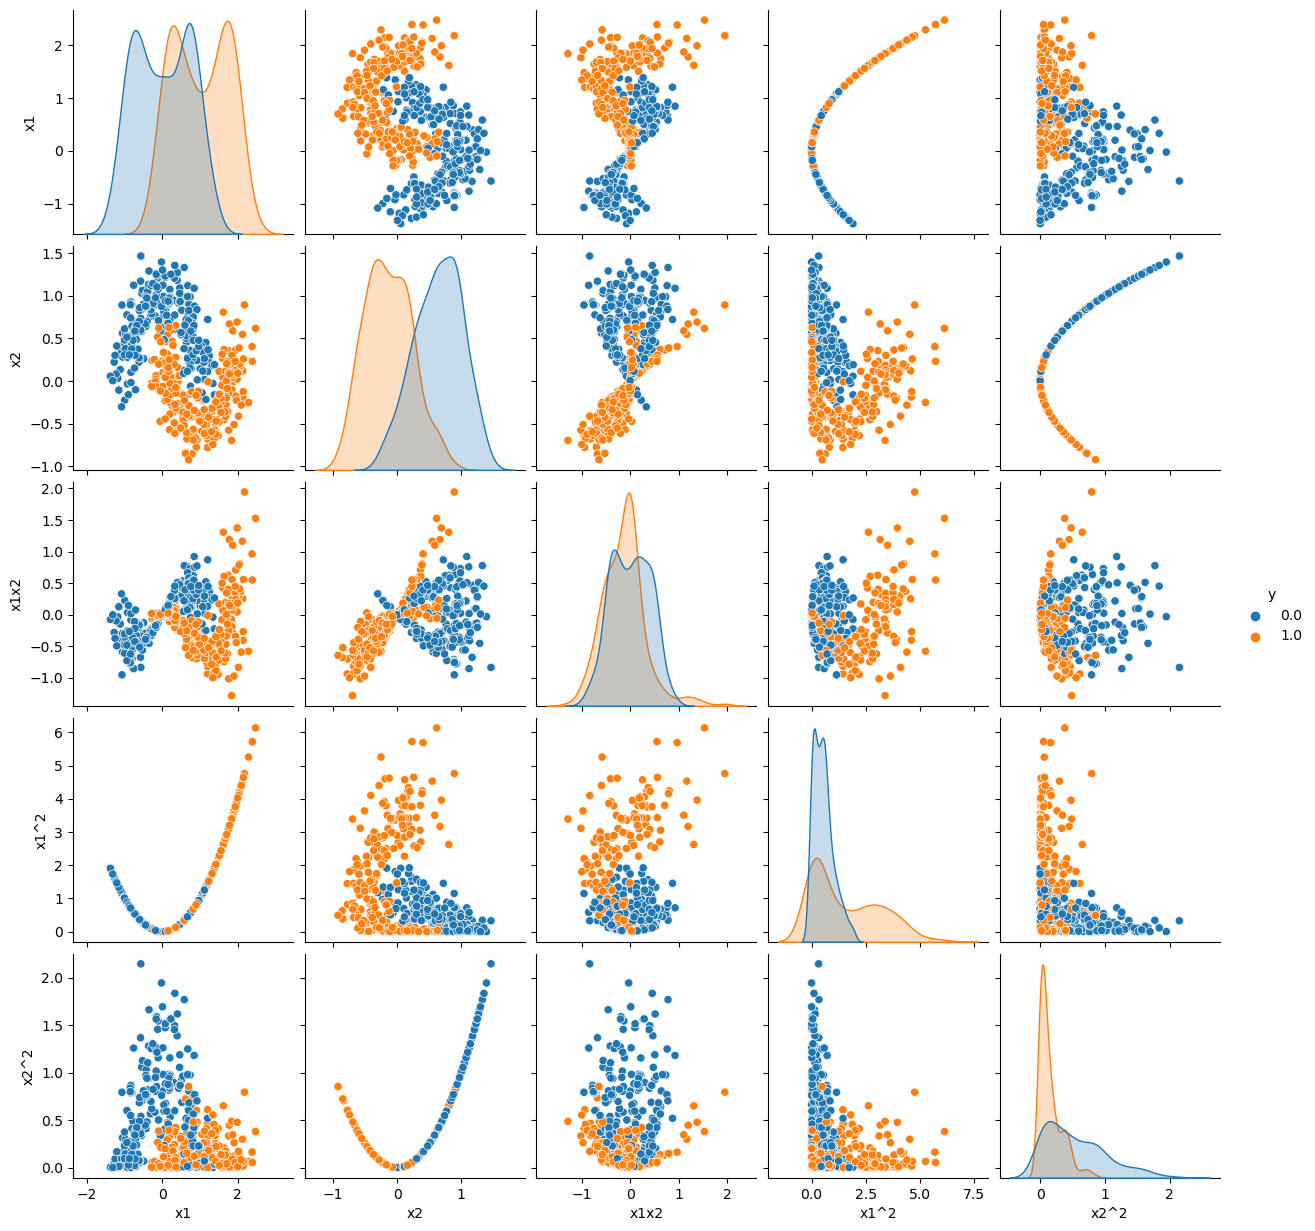

In [11]:
x1 = X[:,0]
x2 = X[:,1]
x1_square = X_2[:,0]
x2_square = X_2[:,1]
x1x2 = np.array([i*j for i,j in X])

W = np.stack((x1, x2, x1x2, x1_square, x2_square, y), axis=1)
df = pd.DataFrame(W)
df.columns = ['x1', 'x2', 'x1x2', 'x1^2', 'x2^2', 'y']
sns.pairplot(df, vars=['x1', 'x2', 'x1x2', 'x1^2', 'x2^2'], hue='y')
